In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
train_df=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_df=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

import json


description_data=open('/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt','r')

In [3]:
description_data_full=description_data.readlines()

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score, mean_squared_log_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from xgboost import XGBRegressor


%matplotlib inline


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train_df.isnull().sum().sort_values(ascending=False)[:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

<AxesSubplot:>

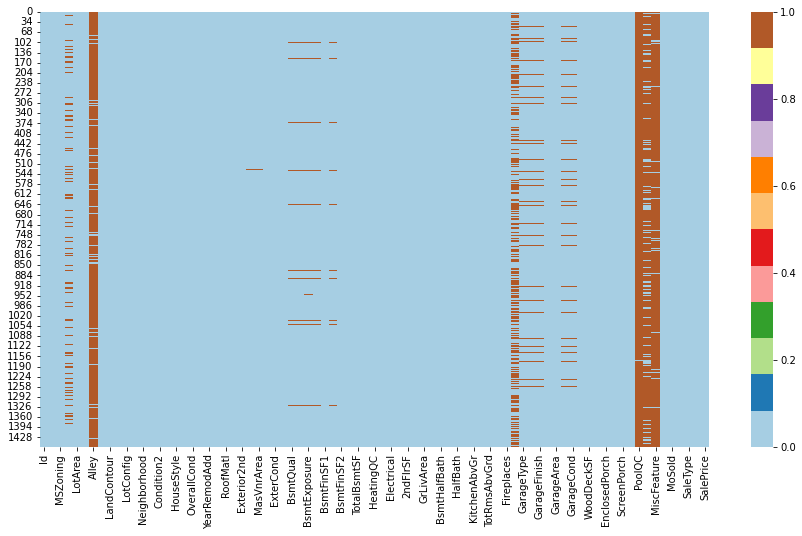

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(train_df.isna(),cmap='Paired')

In [8]:
train_df['PoolQC']= train_df['PoolQC'].fillna('None')
train_df['MiscFeature']= train_df['MiscFeature'].fillna('None')
train_df['Alley']= train_df['Alley'].fillna('None')
train_df['Fence']= train_df['Fence'].fillna('None')
train_df['FireplaceQu']= train_df['FireplaceQu'].fillna('None')

In [9]:
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean())

train_df['GarageYrBlt']= train_df['GarageYrBlt'].fillna(0)
train_df['MasVnrArea']= train_df['MasVnrArea'].fillna(0)


train_df['GarageCond'] = train_df['GarageCond'].fillna(train_df['GarageCond'].value_counts().idxmax())
train_df['GarageType'] = train_df['GarageType'].fillna(train_df['GarageType'].value_counts().idxmax())
train_df['GarageFinish'] = train_df['GarageFinish'].fillna(train_df['GarageFinish'].value_counts().idxmax())
train_df['GarageQual'] = train_df['GarageQual'].fillna(train_df['GarageQual'].value_counts().idxmax())
train_df['BsmtFinType2'] = train_df['BsmtFinType2'].fillna(train_df['BsmtFinType2'].value_counts().idxmax())
train_df['BsmtExposure'] = train_df['BsmtExposure'].fillna(train_df['BsmtExposure'].value_counts().idxmax())
train_df['BsmtQual'] = train_df['BsmtQual'].fillna(train_df['BsmtQual'].value_counts().idxmax())
train_df['BsmtCond'] = train_df['BsmtCond'].fillna(train_df['BsmtCond'].value_counts().idxmax())
train_df['BsmtFinType1'] = train_df['BsmtFinType1'].fillna(train_df['BsmtFinType1'].value_counts().idxmax())
train_df['MasVnrType'] = train_df['MasVnrType'].fillna(train_df['MasVnrType'].value_counts().idxmax())
train_df['Electrical'] = train_df['Electrical'].fillna(train_df['Electrical'].value_counts().idxmax())

In [10]:
label = LabelEncoder()
for i in train_df.columns:
    if train_df[i].dtypes == object:
        train_df[i]= label.fit_transform(train_df[i])

In [11]:
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(n_estimators=160,n_jobs=-1)

In [14]:
model=rf_model.fit(X_train,y_train)

In [15]:
y_preds=model.predict(X_test)

In [16]:
mean_squared_error(y_preds,y_test)


725102796.4659089

In [17]:
mean_absolute_error(y_preds,y_test)

16881.44158105023

In [18]:
mean_squared_log_error(y_preds,y_test)

0.01975805932276806

In [19]:
model.score(X_train,y_train)

0.9789114864735421

In [20]:
model.score(X_test,y_test)

0.8960886996783052

In [21]:
d_test=test_df.copy()
d_train=train_df.copy()

In [22]:
d_test['PoolQC']= d_test['PoolQC'].fillna('None')
d_test['MiscFeature']= d_test['MiscFeature'].fillna('None')
d_test['Alley']= d_test['Alley'].fillna('None')
d_test['Fence']= d_test['Fence'].fillna('None')
d_test['FireplaceQu']= d_test['FireplaceQu'].fillna('None')

d_test['LotFrontage'] = d_test['LotFrontage'].fillna(d_test['LotFrontage'].mean())

# Filling these columns with zero values

d_test['GarageYrBlt']= d_test['GarageYrBlt'].fillna(0)
d_test['MasVnrArea']= d_test['MasVnrArea'].fillna(0)

d_test['GarageCond'] = d_test['GarageCond'].fillna(d_train['GarageCond'].value_counts().idxmax())
d_test['GarageType'] = d_test['GarageType'].fillna(d_train['GarageType'].value_counts().idxmax())
d_test['GarageFinish'] = d_test['GarageFinish'].fillna(d_train['GarageFinish'].value_counts().idxmax())
d_test['GarageQual'] = d_test['GarageQual'].fillna(d_train['GarageQual'].value_counts().idxmax())
d_test['BsmtFinType2'] = d_test['BsmtFinType2'].fillna(d_train['BsmtFinType2'].value_counts().idxmax())
d_test['BsmtExposure'] = d_test['BsmtExposure'].fillna(d_train['BsmtExposure'].value_counts().idxmax())
d_test['BsmtQual'] = d_test['BsmtQual'].fillna(d_train['BsmtQual'].value_counts().idxmax())
d_test['BsmtCond'] = d_test['BsmtCond'].fillna(d_train['BsmtCond'].value_counts().idxmax())
d_test['BsmtFinType1'] = d_test['BsmtFinType1'].fillna(d_train['BsmtFinType1'].value_counts().idxmax())
d_test['MasVnrType'] = d_test['MasVnrType'].fillna(d_train['MasVnrType'].value_counts().idxmax())
d_test['Electrical'] = d_test['Electrical'].fillna(d_train['Electrical'].value_counts().idxmax())
d_test['MSZoning'] = d_test['MSZoning'].fillna(d_train['MSZoning'].value_counts().idxmax())
d_test['BsmtFullBath'] = d_test['BsmtFullBath'].fillna(d_train['BsmtFullBath'].value_counts().idxmax())
d_test['BsmtHalfBath'] = d_test['BsmtHalfBath'].fillna(d_train['BsmtHalfBath'].value_counts().idxmax())
d_test['Functional'] = d_test['Functional'].fillna(d_train['Functional'].value_counts().idxmax())
d_test['Utilities'] = d_test['Utilities'].fillna(d_train['Utilities'].value_counts().idxmax())
d_test['Exterior2nd'] = d_test['Exterior2nd'].fillna(d_train['Exterior2nd'].value_counts().idxmax())
d_test['SaleType'] = d_test['SaleType'].fillna(d_train['SaleType'].value_counts().idxmax())
d_test['Exterior1st'] = d_test['Exterior1st'].fillna(d_train['Exterior1st'].value_counts().idxmax())
d_test['KitchenQual'] = d_test['KitchenQual'].fillna(d_train['KitchenQual'].value_counts().idxmax())


d_test['BsmtFinSF2'] = d_test['BsmtFinSF2'].fillna(d_train['BsmtFinSF2'].mean())
d_test['GarageArea'] = d_test['GarageArea'].fillna(d_train['GarageArea'].mean())
d_test['BsmtFinSF1'] = d_test['BsmtFinSF1'].fillna(d_train['BsmtFinSF1'].mean())
d_test['GarageCars'] = d_test['GarageCars'].fillna(d_train['GarageCars'].mean())
d_test['TotalBsmtSF'] = d_test['TotalBsmtSF'].fillna(d_train['TotalBsmtSF'].mean())
d_test['BsmtUnfSF'] = d_test['BsmtUnfSF'].fillna(d_train['BsmtUnfSF'].mean())

In [23]:
from xgboost import XGBRegressor

xgboost = XGBRegressor()
xgboost.fit(X_train, y_train)
y_pred_xgboost =model.predict(X_test)
y_pred_xgboost.shape

(438,)

In [24]:
d_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [25]:
label = LabelEncoder()
for x in d_test.columns:
    if d_test[x].dtypes == object:
        d_test[x]= label.fit_transform(d_test[x].astype(str))

In [26]:
subs=model.predict(d_test)

In [27]:
id_test = d_test['Id']
d_test = pd.DataFrame(d_test, columns=['ID'])

In [28]:
prediction = pd.DataFrame(subs, columns=["SalePrice"])

In [29]:
output = pd.concat([id_test, prediction],axis=1)

In [30]:
output

,Id,SalePrice
0,1461,123429.68750
1,1462,150722.34375
2,1463,176800.02500
3,1464,177373.76250
4,1465,201194.55000
...,...,...
1454,2915,90995.31250
1455,2916,94306.87500
1456,2917,155315.87500
1457,2918,113967.18750


In [31]:
output.to_csv('submission.csv', index=False)

In [32]:
!head submission.csv

Id,SalePrice
1461,123429.6875
1462,150722.34375
1463,176800.025
1464,177373.7625
1465,201194.55
1466,178210.35625
1467,165705.45
1468,167164.06875
1469,176902.375
